In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.tree import DecisionTreeClassifier

In [2]:
my_dataset=pd.read_csv(r"C:\Users\pc\Desktop\Data Science Assignments\Decision Trees\Company_Data.csv")
my_dataset.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


In [3]:
my_dataset.describe()

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,7.496325,124.975000,68.657500,6.635000,264.840000,115.795000,53.322500,13.900000
std,2.824115,15.334512,27.986037,6.650364,147.376436,23.676664,16.200297,2.620528
min,0.000000,77.000000,21.000000,0.000000,10.000000,24.000000,25.000000,10.000000
25%,5.390000,115.000000,42.750000,0.000000,139.000000,100.000000,39.750000,12.000000
50%,7.490000,125.000000,69.000000,5.000000,272.000000,117.000000,54.500000,14.000000
75%,9.320000,135.000000,91.000000,12.000000,398.500000,131.000000,66.000000,16.000000
max,16.270000,175.000000,120.000000,29.000000,509.000000,191.000000,80.000000,18.000000


In [4]:
l=[]
for i in my_dataset['Sales']:
    if(i<=np.mean(my_dataset['Sales'])):
        l.append('Low Seles')
    else:
        l.append('High Sales')
my_dataset['Sales_cat']=l
my_dataset.head(10)
        

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,Sales_cat
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes,High Sales
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes,High Sales
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes,High Sales
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes,Low Seles
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No,Low Seles
5,10.81,124,113,13,501,72,Bad,78,16,No,Yes,High Sales
6,6.63,115,105,0,45,108,Medium,71,15,Yes,No,Low Seles
7,11.85,136,81,15,425,120,Good,67,10,Yes,Yes,High Sales
8,6.54,132,110,0,108,124,Medium,76,10,No,No,Low Seles
9,4.69,132,113,0,131,124,Medium,76,17,No,Yes,Low Seles


In [5]:
del my_dataset['Sales']

# Label Encodind 

In [6]:
label_encoder=preprocessing.LabelEncoder()

In [7]:
lst=['ShelveLoc','Urban','US','Sales_cat']
for i in lst:
    my_dataset[i]=label_encoder.fit_transform(my_dataset[i])
my_dataset.head(5)

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,Sales_cat
0,138,73,11,276,120,0,42,17,1,1,0
1,111,48,16,260,83,1,65,10,1,1,0
2,113,35,10,269,80,2,59,12,1,1,0
3,117,100,4,466,97,2,55,14,1,1,1
4,141,64,3,340,128,0,38,13,1,0,1


# splitting data using train_test_split method

In [8]:
x=my_dataset.iloc[0:,0:-1]
y=my_dataset['Sales_cat']

In [9]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=101)

# Model Building

In [10]:
model1=DecisionTreeClassifier(criterion='entropy',max_depth=5)
model1.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=5)

In [11]:
prdct=model1.predict(x_test)

In [12]:
Df=pd.DataFrame({'y_test':y_test,'prdct':prdct})
Df

,y_test,prdct
38,1,1
387,0,0
270,0,1
181,1,0
195,1,1
...,...,...
228,1,1
178,0,0
267,1,1
147,0,0


In [13]:
from sklearn.metrics import confusion_matrix,classification_report,plot_confusion_matrix

In [14]:
confusion_matrix(y_test,prdct)

array([[41, 19],
       [13, 47]], dtype=int64)

In [15]:
print(classification_report(y_test,prdct))

              precision    recall  f1-score   support

           0       0.76      0.68      0.72        60
           1       0.71      0.78      0.75        60

    accuracy                           0.73       120
   macro avg       0.74      0.73      0.73       120
weighted avg       0.74      0.73      0.73       120



# Finally, we'll visualize the original and predicted data in a plot.

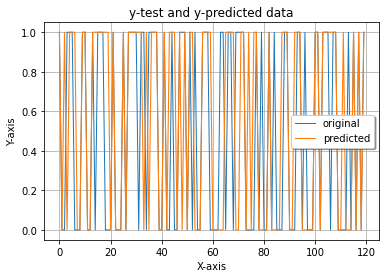

In [16]:
import matplotlib.pyplot as plt
x_ax = range(len(y_test))
plt.plot(x_ax, y_test, linewidth=1, label="original")
plt.plot(x_ax, prdct, linewidth=1.1, label="predicted")
plt.title("y-test and y-predicted data")
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.legend(loc='best',fancybox=True, shadow=True)
plt.grid(True)
plt.show() 

In [17]:
print("accuracy-->",np.mean(prdct==y_test))

accuracy--> 0.7333333333333333


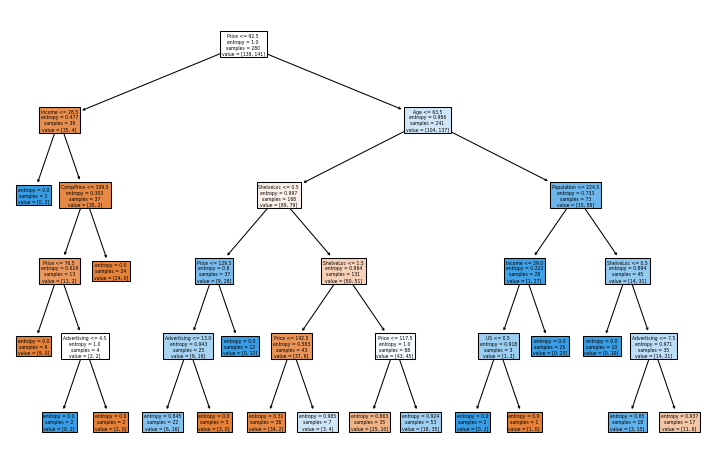

In [18]:
from sklearn.tree import plot_tree
plt.figure(figsize=(12,8), dpi = 75)
plot_tree(model1,filled=True,feature_names=x.columns);